
#                            **Movie Recommendation System**


In this iPython Notebook, I have created basic Movie Recommendation System with Python.

In this blog, I will build a movie recommendation system using The movies dataset.


Extension: Have created a text input bar to add your movie whose recommendation you want. Output will be top 5 movies system will recommend users.

# Import required libraries



In [ ]:
import pandas as pd
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

Read the CSV file:

In [ ]:
df = pd.read_csv('ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
movie_titles = pd.read_csv('movies.csv')
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Merge them together:

In [ ]:
df = pd.merge(df, movie_titles, on = 'movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


Top rated Movies

In [ ]:
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [ ]:
df.groupby('title')['rating'].mean().sort_values(ascending = False).head(500)

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
                                                ... 
Promise, The (La promesse) (1996)                4.5
Miracles - Mr. Canton and Lady Rose (1989)       4.5
Dead Meat (2004)                                 4.5
Thief (1981)                                     4.5
Miss Sloane (2016)                               4.5
Name: rating, Length: 500, dtype: float64

create a ratings dataframe with average rating 

In [ ]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


**Rating variations showed in below graph:**

1.Bar Chart:

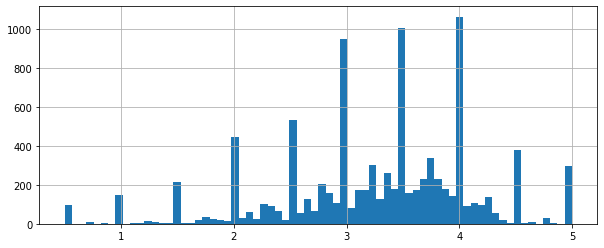

In [ ]:
plt.figure(figsize = (10,4))
ratings['rating'].hist(bins = 70) 

2.Rating analysis by frequency module

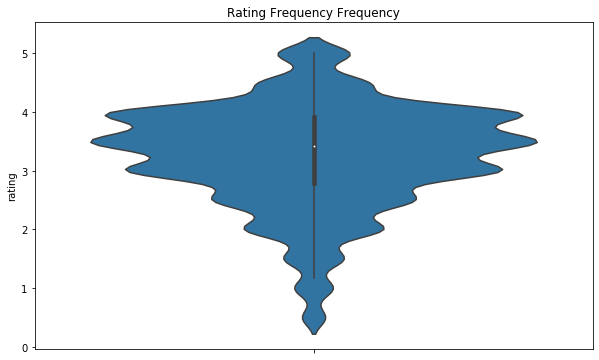

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Rating Frequency Frequency")
sns.axes_style("dark")
sns.violinplot(y=ratings["rating"])
plt.show()

Detailed Rating:

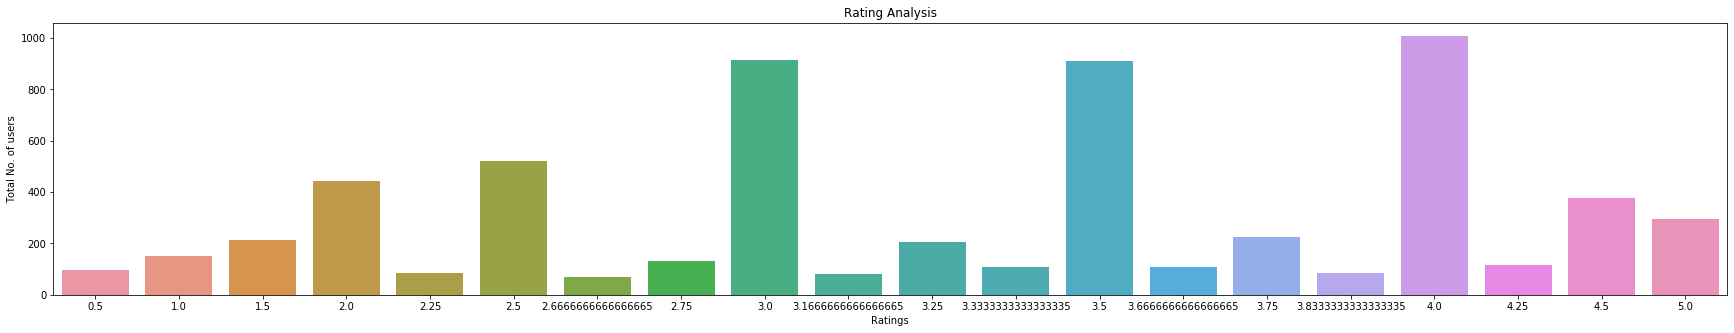

In [ ]:
import nltk
from nltk.probability import FreqDist
b = nltk.FreqDist(ratings.rating)
e = pd.DataFrame({'name': list(b.keys()), 'rating': list(b.values())}) 
e = e.nlargest(columns="rating", n = 20)
plt.figure(figsize=(30,5))
ax = sns.barplot(data=e, x= "name", y = "rating")
ax.set(ylabel = 'Total No. of users') 
ax.set(xlabel = 'Ratings') 
ax.set(title="Rating Analysis")
plt.show()

**Recommending Similar Movies**

In [ ]:
user_ratings =df.pivot_table(index=['userId'],columns=['title'],values='rating')
user_ratings.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Remove the NaN values**

In [ ]:
user_ratings = user_ratings.dropna(thresh=10,axis=1).fillna(0)
user_ratings

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.5,3.5,0.0


Correlation of every other movie

In [ ]:
item_similarity=user_ratings.corr(method='pearson')
item_similarity.head(50)

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",1.000000,0.063117,-0.023768,0.143482,0.011998,0.087931,0.224052,0.034223,0.009277,0.008331,...,0.017477,0.032470,0.134701,0.153158,0.101301,0.049897,0.003233,0.187953,0.062174,0.353194
(500) Days of Summer (2009),0.063117,1.000000,0.142471,0.273989,0.193960,0.148903,0.142141,0.159756,0.135486,0.200135,...,0.374515,0.178655,0.068407,0.414585,0.355723,0.252226,0.216007,0.053614,0.241092,0.125905
10 Cloverfield Lane (2016),-0.023768,0.142471,1.000000,-0.005799,0.112396,0.006139,-0.016835,0.031704,-0.024275,0.272943,...,0.242663,0.099059,-0.023477,0.272347,0.241751,0.195054,0.319371,0.177846,0.096638,0.002733
10 Things I Hate About You (1999),0.143482,0.273989,-0.005799,1.000000,0.244670,0.223481,0.211473,0.011784,0.091964,0.043383,...,0.243118,0.104858,0.132460,0.091853,0.158637,0.281934,0.050031,0.121029,0.130813,0.110612
"10,000 BC (2008)",0.011998,0.193960,0.112396,0.244670,1.000000,0.234459,0.119132,0.059187,-0.025882,0.089328,...,0.260261,0.087592,0.094913,0.184521,0.242299,0.240231,0.094773,0.088045,0.203002,0.083518
101 Dalmatians (1996),0.087931,0.148903,0.006139,0.223481,0.234459,1.000000,0.285112,0.119843,0.072399,0.029967,...,0.114968,0.077232,0.096294,0.067134,0.113224,0.184324,0.054024,0.047804,0.156932,0.078734
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.224052,0.142141,-0.016835,0.211473,0.119132,0.285112,1.000000,0.134037,0.017264,-0.046277,...,0.120302,0.125816,0.049818,0.083650,0.171654,0.274260,0.077594,0.085606,0.248820,0.171118
12 Angry Men (1957),0.034223,0.159756,0.031704,0.011784,0.059187,0.119843,0.134037,1.000000,0.132979,0.058862,...,0.104518,0.028415,0.079905,0.241435,0.144652,0.122107,0.056742,-0.001708,0.074306,0.102744
12 Years a Slave (2013),0.009277,0.135486,-0.024275,0.091964,-0.025882,0.072399,0.017264,0.132979,1.000000,0.249931,...,0.024045,0.038127,0.013786,0.190366,0.104150,0.017351,0.063325,0.002528,0.037469,0.004213


Recommendating movie above **2.5** rating

In [ ]:
def get_movies(movie_name,user_rating):
    score=item_similarity[movie_name]*(user_rating-2.5)
    score=score.sort_values(ascending=False)
     
    return score

 Let's choose two movies for our system:

In [ ]:
Recom =[("2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",5),
       ("12 Years a Slave (2013)",4),("2012 (2009)",3)]
        
getmovies = pd.DataFrame()

for movie,rating in Recom :
    getmovies=getmovies.append(get_movies(movie,rating),ignore_index=True)
    
getmovies.head()
getmovies.sum().sort_values(ascending=False)

2 Fast 2 Furious (Fast and the Furious 2, The) (2003)         2.704922
12 Years a Slave (2013)                                       1.681464
Fast and the Furious, The (2001)                              1.661849
Fast & Furious (Fast and the Furious 4, The) (2009)           1.624116
Mission: Impossible III (2006)                                1.564542
                                                                ...   
Madness of King George, The (1994)                           -0.167709
Like Water for Chocolate (Como agua para chocolate) (1992)   -0.174538
Postman, The (Postino, Il) (1994)                            -0.187298
Piano, The (1993)                                            -0.228324
Clear and Present Danger (1994)                              -0.249059
Length: 2269, dtype: float64

Above System is Showing Top 5 movies which is recommending to the user 